# Phase III: Hypothesis Testing

In this phase, we test hypotheses about our basketball data to uncover insights and validate assumptions. Using statistical methods, we explore relationships between variables like height, weight, and performance. Our goal is to identify key factors influencing player and team outcomes, transforming raw data into actionable knowledge.

## Importing Modules

In [3]:
import pandas as pd
from scipy.stats import shapiro, ttest_ind , stats

## Hypothesis I
We hypothesize that player agility, defined as the ratio of height to weight, has significantly increased in recent years.

> *Null Hypothesis*: No significant difference in mean agility between the two periods.
> 
> *Alternative Hypothesis*: Mean agility has significantly increased in the second period (2022-2023 to 2023-2024).

In [4]:
# Load the data
data_agility = pd.read_csv("data/top50players_data.csv")
data_agility.head()

,Unnamed: 0,rank,player_name,player_id,team_id,year,height_cm,weight_kg,position,shooting_hand,retired,experience,birthplace,birthdate
0,0,1,James Harden,h/hardeja01,HOU,2020,196,99,"['Point Guard', 'Shooting Guard']",Left,False,15,United States,1989-08-26
1,1,2,Damian Lillard,l/lillada01,POR,2020,188,88,['Point Guard'],Right,False,12,United States,1990-07-15
2,2,3,Devin Booker,b/bookede01,PHO,2020,198,93,"['Shooting Guard', 'Point Guard']",Right,False,9,United States,1996-10-30
3,3,4,Giannis Antetokounmpo,a/antetgi01,MIL,2020,211,109,"['Power Forward', 'Small Forward', 'Point Guar...",Right,False,11,Greece,1994-12-06
4,4,5,Trae Young,y/youngtr01,ATL,2020,185,74,['Point Guard'],Right,False,6,United States,1998-09-19


In [5]:
# Create a copy of the data to avoid modifying the original dataset
copy_data_agility = data_agility.copy()

In [10]:
# Filter data for top 25 players and exclude the year 2020
filtered_data_agility = copy_data_agility[(copy_data_agility['rank'] <= 20) & (copy_data_agility['year'] != 2020)]
filtered_data_agility = filtered_data_agility.copy()
filtered_data_agility.head()

,Unnamed: 0,rank,player_name,player_id,team_id,year,height_cm,weight_kg,position,shooting_hand,retired,experience,birthplace,birthdate
50,50,1,Stephen Curry,c/curryst01,GSW,2021,188,83,['Point Guard'],Right,False,15,United States,1988-03-14
51,51,2,Damian Lillard,l/lillada01,POR,2021,188,88,['Point Guard'],Right,False,12,United States,1990-07-15
52,52,3,Nikola Jokić,j/jokicni01,DEN,2021,211,128,['Center'],Right,False,9,Serbia,1995-02-19
53,53,4,Bradley Beal,b/bealbr01,WAS,2021,193,93,['Shooting Guard'],Right,False,12,United States,1993-06-28
54,54,5,Luka Dončić,d/doncilu01,DAL,2021,198,104,"['Point Guard', 'Shooting Guard']",Right,False,6,Slovenia,1999-02-28


In [11]:
# Calculate agility as height divided by weight
filtered_data_agility.loc['agility'] = filtered_data_agility['height_cm'] / filtered_data_agility['weight_kg']
filtered_data_agility.head()

,Unnamed: 0,rank,player_name,player_id,team_id,year,height_cm,weight_kg,position,shooting_hand,retired,experience,birthplace,birthdate
50,50.0,1.0,Stephen Curry,c/curryst01,GSW,2021.0,188.0,83.0,['Point Guard'],Right,0.0,15.0,United States,1988-03-14
51,51.0,2.0,Damian Lillard,l/lillada01,POR,2021.0,188.0,88.0,['Point Guard'],Right,0.0,12.0,United States,1990-07-15
52,52.0,3.0,Nikola Jokić,j/jokicni01,DEN,2021.0,211.0,128.0,['Center'],Right,0.0,9.0,Serbia,1995-02-19
53,53.0,4.0,Bradley Beal,b/bealbr01,WAS,2021.0,193.0,93.0,['Shooting Guard'],Right,0.0,12.0,United States,1993-06-28
54,54.0,5.0,Luka Dončić,d/doncilu01,DAL,2021.0,198.0,104.0,"['Point Guard', 'Shooting Guard']",Right,0.0,6.0,Slovenia,1999-02-28


In [106]:
# Divide data into two periods
agility_period1 = filtered_data_agility[filtered_data_agility['year'].between(2021, 2022)]  # 2020-2021 to 2021-2022
agility_period1.head()

,rank,player_name,player_id,team_id,year,height_cm,weight_kg,agility
50,1,Stephen Curry,c/curryst01,GSW,2021,188,83,2.265060
51,2,Damian Lillard,l/lillada01,POR,2021,188,88,2.136364
52,3,Nikola Jokić,j/jokicni01,DEN,2021,211,128,1.648438
53,4,Bradley Beal,b/bealbr01,WAS,2021,193,93,2.075269
54,5,Luka Dončić,d/doncilu01,DAL,2021,198,104,1.903846


In [107]:
agility_period2 = filtered_data_agility[filtered_data_agility['year'].between(2023, 2024)]  # 2022-2023 to 2023-2024
agility_period2.head()

,rank,player_name,player_id,team_id,year,height_cm,weight_kg,agility
150,1,Jayson Tatum,t/tatumja01,BOS,2023,203,95,2.136842
151,2,Joel Embiid,e/embiijo01,PHI,2023,213,127,1.677165
152,3,Luka Dončić,d/doncilu01,DAL,2023,198,104,1.903846
153,4,Shai Gilgeous-Alexander,g/gilgesh01,OKC,2023,198,90,2.200000
154,5,Giannis Antetokounmpo,a/antetgi01,MIL,2023,211,109,1.935780


In [108]:
# Calculate mean agility for both periods
mean_agility_1 = agility_period1['agility'].mean()
mean_agility_2 = agility_period2['agility'].mean()

# Print the mean agility for both periods
print(f"Mean agility for period 1: {mean_agility_1:.3f}")
print(f"Mean agility for period 2: {mean_agility_2:.3f}")

Mean agility for period 1: 2.033
Mean agility for period 2: 2.037


In [109]:
# Test for normality in both periods
shapiro_1 = shapiro(agility_period1['agility'])
print(f"Shapiro-Wilk for Period 1:{shapiro_1}")
shapiro_2 = shapiro(agility_period2['agility'])
print(f"Shapiro-Wilk for Period 2:", shapiro_2)

Shapiro-Wilk for Period 1:ShapiroResult(statistic=np.float64(0.9739116217898544), pvalue=np.float64(0.4742123510404268))
Shapiro-Wilk for Period 2: ShapiroResult(statistic=np.float64(0.9723240853775476), pvalue=np.float64(0.42504656567520066))


In [110]:
# Print the normality test results
print(f"Shapiro-Wilk Test for Period 1:")

print(f"  Statistic: {shapiro_1.statistic:.4f}")

print(f"  P-value: {shapiro_1.pvalue:.4f}")

print(f"  Normality: {'Accepted' if shapiro_1.pvalue > 0.05 else 'Rejected'}")

print(f"Shapiro-Wilk Test for Period 2:")

print(f"  Statistic: {shapiro_2.statistic:.4f}")

print(f"  P-value: {shapiro_2.pvalue:.4f}")

print(f"  Normality: {'Accepted' if shapiro_2.pvalue > 0.05 else 'Rejected'}")

Shapiro-Wilk Test for Period 1:
  Statistic: 0.9739
  P-value: 0.4742
  Normality: Accepted
Shapiro-Wilk Test for Period 2:
  Statistic: 0.9723
  P-value: 0.4250
  Normality: Accepted


In [111]:
from scipy.stats import levene

# Perform Levene's test to check if the variances of the two groups are equal
# Levene's test null hypothesis (H0): The variances of both groups are equal.
# Alternative hypothesis (H1): The variances are different.
stat, p = levene(agility_period1['agility'], agility_period2['agility'])

# If p-value > 0.05, we do not reject H0, meaning variances are roughly equal.
if p > 0.05:
    print("Variances are equal, so we can use equal_var=True in the t-test.")
# If p-value <= 0.05, we reject H0, meaning variances are significantly different.
else:
    print("Variances are not equal, so we should use equal_var=False in the t-test.")

Variances are equal, so we can use equal_var=True in the t-test.


In [112]:
import scipy.stats as stats

# Perform independent one-tailed T-test (checking if period_2 > period_1)
t_stat, p_value = stats.ttest_ind(agility_period1['agility'], agility_period2['agility'], equal_var=True, alternative='greater')

# Print the T-test results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Hypothesis Testing
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Result: The null hypothesis (H0) is rejected. Agility has significantly increased in the second period.")
else:
    print("Result: There is not enough evidence to reject the null hypothesis. We cannot conclude that agility has increased.")

T-statistic: -0.074
P-value: 0.530
Result: There is not enough evidence to reject the null hypothesis. We cannot conclude that agility has increased.


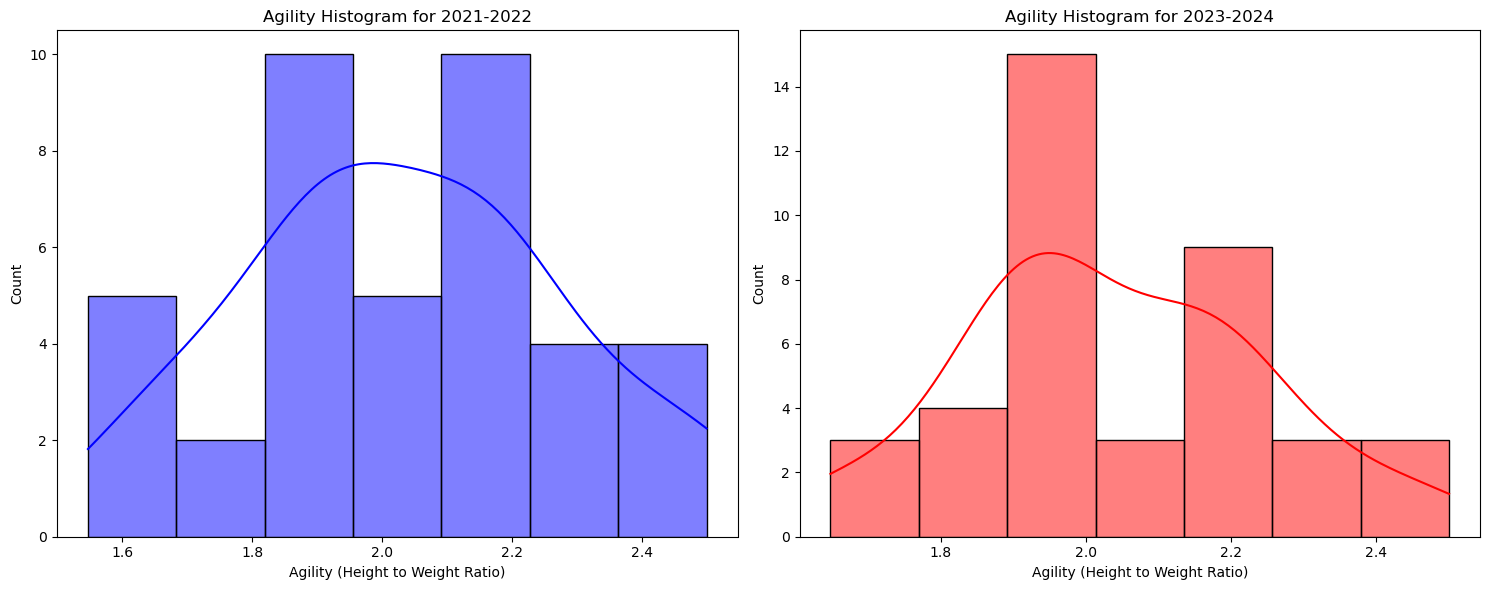

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for 2020-2021 period on the first subplot
sns.histplot(agility_period1['agility'], kde=True, color='blue', stat='count', ax=axes[0])
axes[0].set_title('Agility Histogram for 2021-2022')
axes[0].set_xlabel('Agility (Height to Weight Ratio)')
axes[0].set_ylabel('Count')

# Plot histogram for 2022-2023 period on the second subplot
sns.histplot(agility_period2['agility'], kde=True, color='red', stat='count', ax=axes[1])
axes[1].set_title('Agility Histogram for 2023-2024')
axes[1].set_xlabel('Agility (Height to Weight Ratio)')
axes[1].set_ylabel('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

# Hypothesis II

> *Null Hypothesis* : The average intrinsic ability of the champion team's players in the last two seasons is the same as in the previous two seasons.
> 
> *Alternative Hypothesis* : The average intrinsic ability of the champion team's players in the last two seasons is greater than in the previous two seasons.

In [116]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu

In [120]:
# Load the dataset
data_ability = pd.read_csv("data/top_team_players_data.csv")
data_ability.head()

,player_name,player_id,team_id,year,retired,experience,birthdate,Age,intrinsic_ability
0,Giannis Antetokounmpo,a/antetgi01,MIL,2020,False,6,12/6/1994,30,0.200000
1,Thanasis Antetokounmpo,a/antetth01,MIL,2020,False,1,7/18/1992,32,0.031250
2,Dragan Bender,b/bendedr01,MIL,2020,True,3,11/17/1997,27,0.111111
3,Eric Bledsoe,b/bledser01,MIL,2020,True,9,12/9/1989,35,0.257143
4,Sterling Brown,b/brownst02,MIL,2020,False,2,2/10/1995,29,0.068966


In [121]:
# Create a copy of the dataset
copy_data_ability = data_ability.copy()

In [122]:
# Divide data into two periods
ability_period_1 = copy_data_ability[copy_data_ability['year'].between(2021, 2022)]  # 2020-2021 to 2021-2022
ability_period_1.head()

,player_name,player_id,team_id,year,retired,experience,birthdate,Age,intrinsic_ability
35,Udoka Azubuike,a/azubuud01,UTA,2021,False,0,9/17/1999,25,0.000000
36,Bojan Bogdanović,b/bogdabo02,UTA,2021,False,6,4/18/1989,35,0.171429
37,Jarrell Brantley,b/brantja01,UTA,2021,False,1,6/7/1996,28,0.035714
38,Jordan Clarkson,c/clarkjo01,UTA,2021,False,6,6/7/1992,32,0.187500
39,Mike Conley,c/conlemi01,UTA,2021,False,13,10/11/1987,37,0.351351


In [123]:
ability_period_2 = copy_data_ability[data_copy['year'].between(2023, 2024)]  # 2022-2023 to 2023-2024
ability_period_2.head()

,player_name,player_id,team_id,year,retired,experience,birthdate,Age,intrinsic_ability
116,Grayson Allen,a/allengr01,MIL,2023,False,4,10/8/1995,29,0.137931
117,Giannis Antetokounmpo,a/antetgi01,MIL,2023,False,9,12/6/1994,30,0.300000
118,Thanasis Antetokounmpo,a/antetth01,MIL,2023,False,4,7/18/1992,32,0.125000
119,MarJon Beauchamp,b/beaucma01,MIL,2023,False,0,10/12/2000,24,0.000000
120,Jevon Carter,c/carteje01,MIL,2023,False,4,9/14/1995,29,0.137931


In [124]:
# Calculate mean intrinsic_ability for both periods
mean_intrinsic_ability_1 = ability_period_1['intrinsic_ability'].mean()
print(f"mean for intrinsic_ability in Period1: {mean_intrinsic_ability_1}")
mean_intrinsic_ability_2 = ability_period_2['intrinsic_ability'].mean()
print(f"mean for intrinsic_ability in Period2: {mean_intrinsic_ability_2}")

mean for intrinsic_ability in Period1: 0.11732189254320988
mean for intrinsic_ability in Period2: 0.17959903813333333


In [125]:
# Check if the intrinsic ability data is normally distributed for both periods
shapiro_1 = shapiro(ability_period_1['intrinsic_ability'])
print(f"Shapiro-Wilk for Period 1: {shapiro_1}")
shapiro_2 = shapiro(ability_period_2['intrinsic_ability'])
print(f"Shapiro-Wilk for Period 2:", shapiro_2)

Shapiro-Wilk for Period 1:ShapiroResult(statistic=np.float64(0.9084076142851828), pvalue=np.float64(2.52362453786993e-05))
Shapiro-Wilk for Period 2: ShapiroResult(statistic=np.float64(0.9463447845580649), pvalue=np.float64(0.003158702743104995))


In [126]:
# Display the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test for Period 1:")

print(f"  Statistic: {shapiro_1.statistic:.4f}")

print(f"  P-value: {shapiro_1.pvalue:.4f}")

print(f"  Normality: {'Accepted' if shapiro_1.pvalue > 0.05 else 'Rejected'}")

print(f"\nShapiro-Wilk Test for Period 2:")

print(f"  Statistic: {shapiro_2.statistic:.4f}")

print(f"  P-value: {shapiro_2.pvalue:.4f}")

print(f"  Normality: {'Accepted' if shapiro_2.pvalue > 0.05 else 'Rejected'}")

Shapiro-Wilk Test for Period 1:
  Statistic: 0.9084
  P-value: 0.0000
  Normality: Rejected

Shapiro-Wilk Test for Period 2:
  Statistic: 0.9463
  P-value: 0.0032
  Normality: Rejected


In [135]:
# Use Mann-Whitney U test to compare intrinsic ability between the two periods
stat, p_value = mannwhitneyu(ability_period_1['intrinsic_ability'], ability_period_2['intrinsic_ability'] , alternative='greater')

In [141]:
# Display the Mann-Whitney U test results
print(f"\nMann-Whitney U Test:")
print(f"  Statistic: {stat}")
print(f"  P-value: {p_value}")


Mann-Whitney U Test:
  Statistic: 2133.0
  P-value: 0.9993507092031229


In [140]:
if p_value < 0.05:
    print("Null hypothesis rejected.")
    print("This suggests that the average intrinsic ability in period 2 is significantly greater than in period 1.")
else:
    print("Null hypothesis not rejected")
    print("This suggests that there is no strong evidence to conclude that the average intrinsic ability in period 2 is greater than in period 1.")

Null hypothesis not rejected
This suggests that there is no strong evidence to conclude that the average intrinsic ability in period 2 is greater than in period 1.


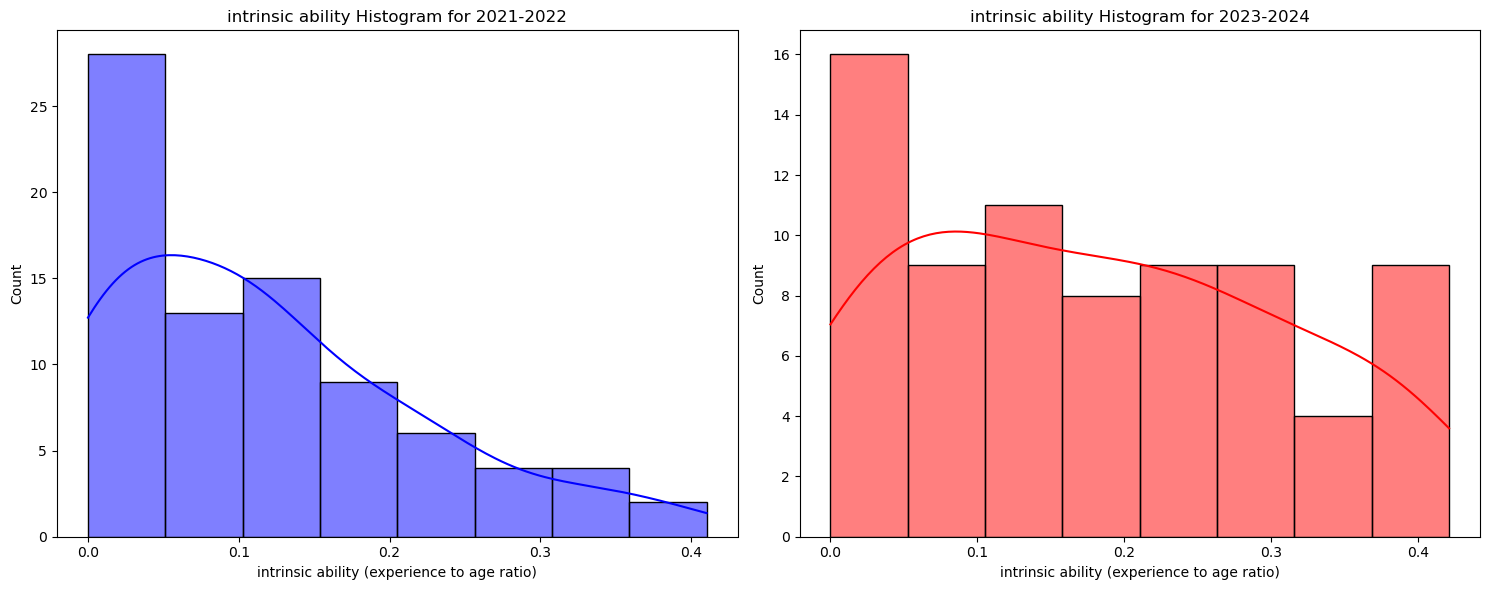

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for 2020-2021 period on the first subplot
sns.histplot(ability_period_1['intrinsic_ability'], kde=True, color='blue', stat='count', ax=axes[0])
axes[0].set_title('intrinsic ability Histogram for 2021-2022')
axes[0].set_xlabel('intrinsic ability (experience to age ratio)')
axes[0].set_ylabel('Count')

# Plot histogram for 2022-2023 period on the second subplot
sns.histplot(ability_period_2['intrinsic_ability'], kde=True, color='red', stat='count', ax=axes[1])
axes[1].set_title('intrinsic ability Histogram for 2023-2024')
axes[1].set_xlabel('intrinsic ability (experience to age ratio)')
axes[1].set_ylabel('Count')

# Adjust layout for better visualization
plt.tight_layout()
# Show the plots
plt.show()